<a href="https://colab.research.google.com/github/mohtashim0007/Machine-Learning-Projects/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Classification Model
Dataset = The dataset used for this project is Pima Indians Diabetes Dataset from Kaggle.

Visit my website for Diabete Prediction using your custom values [Click here ](https://mohtashim0007-diabetes-classification-web-main-dvsfd1.streamlitapp.com/)

# Features of the dataset:

The dataset contains 768 individuals data with 9 features set. The detailed description of all the features are as follows:

Pregnancies: indicates the number of pregnancies

Glucose: indicates the plasma glucose concentration

Blood Pressure: indicates diastolic blood pressure in mm/Hg

Skin Thickness: indicates triceps skinfold thickness in mm

Insulin: indicates insulin in U/mL

BMI: indicates the body mass index in kg/m2

Diabetes Pedigree Function: indicates the function which scores likelihood of diabetes based on family history

Age: indicates the age of the person

Outcome: indicates if the patient had a diabetes or not (1 = yes, 0 = no)

# Result
Random Forest Classifier Model performs best with accuracy of : 

Training Accuracy Score=  0.99 %

Testing Accuracy Score =  0.84 %

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [409]:
df = pd.read_csv('/content/drive/My Drive/DataSet/diabetes.csv')
df2 = df

# Exploratory Data Analysis

In [410]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [411]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [413]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


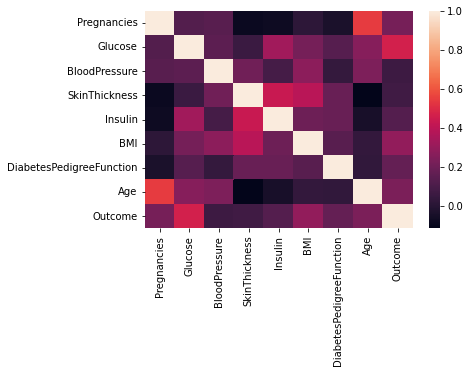

In [414]:
sns.heatmap(df.corr())
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f151c95de10>,
      dtype=object)

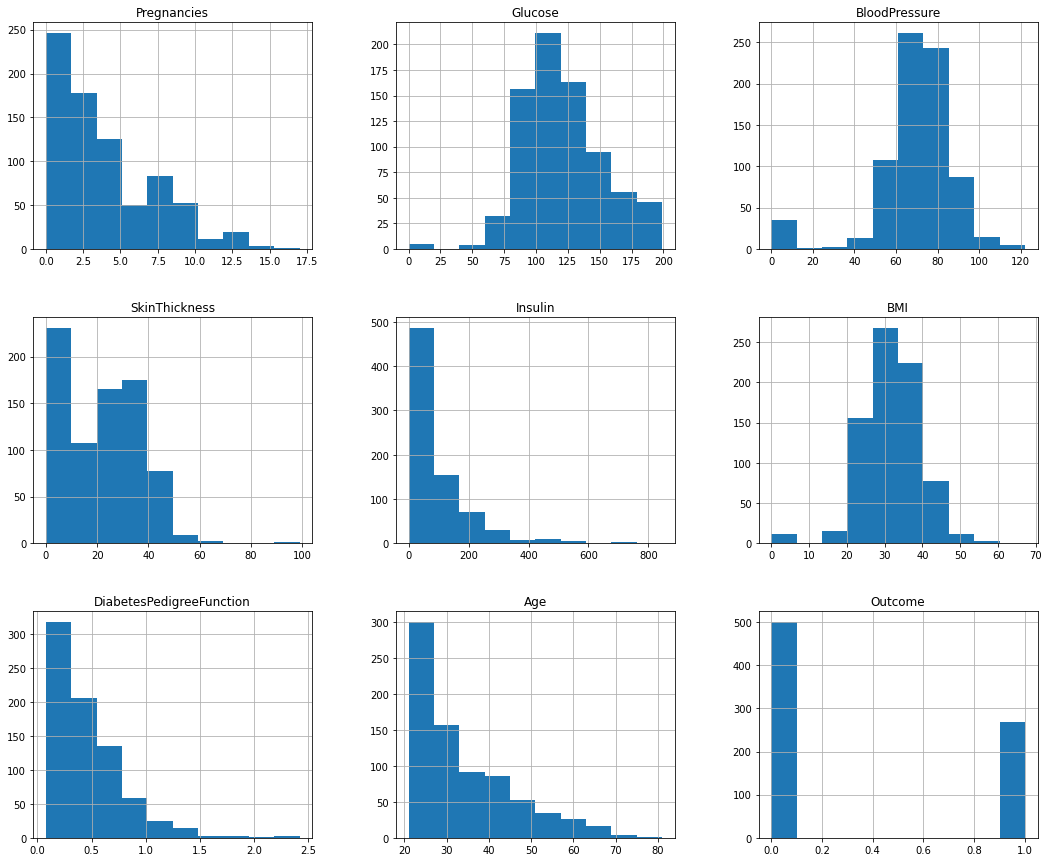

In [415]:
df.hist(figsize = (18,15))

[]

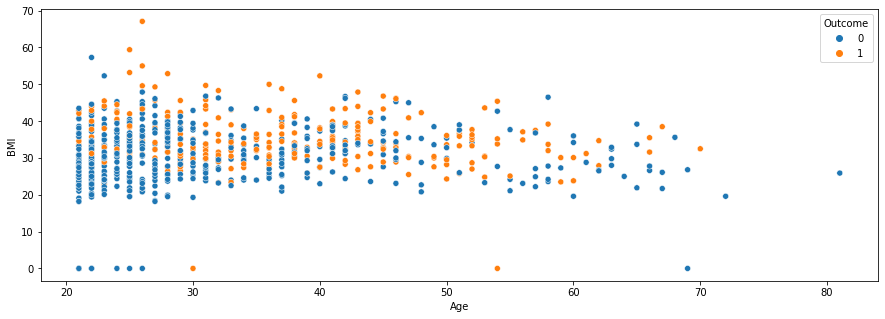

In [416]:
fig = plt.figure(figsize = (15,5))
sns.scatterplot(data = df, x= 'Age', y = 'BMI', hue= 'Outcome')
plt.plot()

In [417]:
# fig = plt.figure(figsize = (18,20))
# sns.pairplot(data = df, hue = 'Outcome')
# plt.plot()

For Replacing 0 values I have divided data by Outcomes. For the type of outcome I repalced 0 with the mean of respective columns.

In [418]:
df20 = df[df['Outcome'] == 0]
df21 = df[df['Outcome'] == 1]

In [419]:
df20.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [420]:
df21.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [421]:
df20['BloodPressure'] = df20['BloodPressure'].replace(0.0, df20['BloodPressure'].mean())
df20['BMI']=df20['BMI'].replace(0.0, df20['BMI'].mean())
df20['Glucose']=df20['Glucose'].replace(0.0, df20['Glucose'].mean())
df20['SkinThickness']=df20['SkinThickness'].replace(0.0, df20['SkinThickness'].mean())
df20['Insulin']=df20['Insulin'].replace(0.0, df20['Insulin'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [422]:
df20.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,110.639880,70.774992,25.130592,101.261824,30.849676,0.429734,31.190000,0.0
std,3.017185,24.702368,11.938583,9.168235,80.497222,6.501723,0.299085,11.667655,0.0
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.000000,63.500000,19.664000,68.792000,25.750000,0.229750,23.000000,0.0
50%,2.000000,107.500000,70.000000,21.000000,68.792000,30.304200,0.336000,27.000000,0.0
75%,5.000000,125.000000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.000000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [423]:
df20['Insulin'].value_counts() 

68.792     236
105.000     10
140.000      8
94.000       7
100.000      6
          ... 
68.000       1
231.000      1
545.000      1
122.000      1
112.000      1
Name: Insulin, Length: 137, dtype: int64

In [424]:
df21['BloodPressure'] = df21['BloodPressure'].replace(0.0, df21['BloodPressure'].mean())
df21['BMI']=df21['BMI'].replace(0.0, df21['BMI'].mean())
df21['Glucose']=df21['Glucose'].replace(0.0, df21['Glucose'].mean())
df21['SkinThickness']=df21['SkinThickness'].replace(0.0, df21['SkinThickness'].mean())
df21['Insulin']=df21['Insulin'].replace(0.0, df21['Insulin'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [425]:
df21.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,142.311623,75.052963,29.441969,152.001281,35.404795,0.550500,37.067164,1.0
std,3.741239,29.488275,11.973314,9.874067,106.545973,6.590200,0.372354,10.968254,0.0
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000,1.0
25%,1.750000,119.000000,68.000000,22.164179,100.335821,30.900000,0.262500,28.000000,1.0
50%,4.000000,140.500000,74.000000,27.000000,100.335821,34.300000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


Merging both dataframe(DF21 for 1 outcome data and DF20 for 0 outcome data) to single one as df2

In [426]:
df2 = pd.concat((df20,df21))

#Randomize or data beacaue at the momemnt all 1's otcome is at top and 0's are at bottom
df2 = df2.sample(frac=1, random_state=2)

In [427]:
df2.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136.0,70.0,32.000000,110.000000,37.1,0.153,43,1
220,0,177.0,60.0,29.000000,478.000000,34.6,1.072,21,1
758,1,106.0,76.0,19.664000,68.792000,37.5,0.197,26,0
61,8,133.0,72.0,22.164179,100.335821,32.9,0.270,39,1
272,3,122.0,78.0,19.664000,68.792000,23.0,0.254,40,0


In [428]:
#Assigning target value to different variable and dropping from df2
df_target = df2['Outcome']
df = df2.drop(columns = ['Outcome'])

In [429]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
256,3,111.0,56.0,39.000000,68.792000,30.1,0.557,30
407,0,101.0,62.0,19.664000,68.792000,21.9,0.336,25
338,9,152.0,78.0,34.000000,171.000000,34.2,0.893,33
746,1,147.0,94.0,41.000000,100.335821,49.3,0.358,27
539,3,129.0,92.0,49.000000,155.000000,36.4,0.968,32
...,...,...,...,...,...,...,...,...
88,15,136.0,70.0,32.000000,110.000000,37.1,0.153,43
220,0,177.0,60.0,29.000000,478.000000,34.6,1.072,21
758,1,106.0,76.0,19.664000,68.792000,37.5,0.197,26
61,8,133.0,72.0,22.164179,100.335821,32.9,0.270,39


In [430]:
pickle.dump(df, open('df.pkl', 'wb'))

# Normalization of data

In [431]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split

In [432]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)


In [433]:

#Splitting traintest data to 20 percent as training 

train_x, test_x, train_y, test_y = train_test_split(df,df_target, test_size=0.2, random_state=40)


In [434]:
pickle.dump(test_x,open('test_x.pkl', 'wb'))
pickle.dump(test_y,open('test_y.pkl', 'wb'))

In [435]:
test_y.value_counts()

0    108
1     46
Name: Outcome, dtype: int64

# SVM Model building

In [436]:
from sklearn.svm import SVC

model2 = SVC()

model2.fit(train_x, train_y)
print('Training Accuracy Score = ',model2.score(train_x,train_y))

print('Testing Accuracy Score = ', model2.score(test_x,test_y))

Training Accuracy Score =  0.7964169381107492
Testing Accuracy Score =  0.8311688311688312


In [437]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
pred_y = model2.predict(test_x)
confusion_matrix(test_y,pred_y)

array([[100,   8],
       [ 18,  28]])

# Random Forest Model

In [438]:

from sklearn.ensemble import RandomForestClassifier

In [439]:
model = RandomForestClassifier(n_estimators=10)
model.fit(train_x,train_y)
print('Training Accuracy Score = ', model.score(train_x,train_y))

print('Training Accuracy Score = ',model.score(test_x,test_y))

Training Accuracy Score =  0.993485342019544
Training Accuracy Score =  0.8441558441558441


In [440]:
import pickle
pickle.dump(model,open('modelRF.pkl', 'wb'))
pickle.dump(model2,open('modelSVM.pkl', 'wb'))

In [441]:
#let us get the predictions using the classifier we had fit above
pred_y = model.predict(test_x)
confusion_matrix(test_y,pred_y)

array([[95, 13],
       [11, 35]])

# Streamlit Web Coding

In [454]:

%%writefile app.py

import streamlit as st
import sklearn
import pickle

#unpickle model for Random Forest
model = pickle.load(open('modelRF.pkl', 'rb'))
#Unpickle model for SVM
model2 = pickle.load(open('modelSVM.pkl', 'rb'))

df = pickle.load(open('df.pkl', 'rb'))

#Unpicling dataframe to show on web
test_x = pickle.load(open('test_x.pkl', 'rb'))
test_y = pickle.load(open('test_y.pkl', 'rb'))
test_y.reset_index(drop = True, inplace = True)

def isDiabetic(val):
  if val == 1:
    return 'Person is Diabetic.'
  else:
    return 'Person is NOT Diabetic.'



# WEB CODING

st.header('Diabetes Prediction Classification Model')
st.text(' ')


radio = st.sidebar.radio('Main Menu', ['Use Testing Data', 'Use Custom Data'])

#TESTING DATA RADIO BUTTON

if radio == 'Use Testing Data':
  ind = st.slider('Slide to select index value for Testing Data : ', min_value = 0, max_value = 153)
  out = isDiabetic(test_y[ind])
  st.write('Labeled Outcome for the above Data is ', out)

  st.subheader("Model Prediction")

  radio2 = st.radio('Select Model : ',['Random Forest Model','SVM Model'], key = "2" )
  if radio2 == 'Random Forest Model':
    st.write('Random Forest Predicted : ', isDiabetic(model.predict([test_x[ind]])))
    st.write('Random Forest Model Testing Data Accuracy = 99.34%')
    st.write('Random Forest Model Training Data Accuracy = 85.06%')

  else :
    st.write('SVM Predicted : ', isDiabetic(model2.predict([test_x[ind]])))
    st.write('SVM Model Testing Data Accuracy = 79.64%')
    st.write('SVM Model Training Data Accuracy = 83.12%')


elif radio == 'Use Custom Data':
  col1, col2 = st.columns([1,1])

  #NOrmalization method X_new = (X - X_min)/(X_max - X_min)
  with col1:
    Glucose = st.number_input('Glucose :',  df['Glucose'].min(), df['Glucose'].max(), value = df['Glucose'].mean(), step = 3.4)
    Glucose = (Glucose - df['Glucose'].min()) / (df['Glucose'].max() - df['Glucose'].min())
    BloodPressure = st.number_input('BloodPressure :',  df['BloodPressure'].min(), df['BloodPressure'].max(), value = df['BloodPressure'].mean(), step = 3.4)
    BloodPressure = (BloodPressure - df['BloodPressure'].min()) / (df['BloodPressure'].max() - df['BloodPressure'].min())
    SkinThickness = st.number_input('SkinThickness :',  df['SkinThickness'].min(), df['SkinThickness'].max(), value = df['SkinThickness'].mean(), step = 3.4)
    SkinThickness = (SkinThickness - df['SkinThickness'].min()) / (df['SkinThickness'].max() - df['SkinThickness'].min())
    Insulin = st.number_input('Insulin :',  df['Insulin'].min(), df['Insulin'].max(), value = df['Insulin'].mean(), step = 3.4)
    Insulin = (Insulin - df['Insulin'].min()) / (df['Insulin'].max() - df['Insulin'].min())

  with col2:
    BMI = st.number_input('BMI :',  df['BMI'].min(), df['BMI'].max(), value = df['BMI'].mean(), step = 3.4)
    BMI = (BMI - df['BMI'].min()) / (df['BMI'].max() - df['BMI'].min())
    Age = st.number_input('Age :',  df['Age'].min(), df['Age'].max(), value = 27, step = 4)
    Age = (Age - df['Age'].min()) / (df['Age'].max() - df['Age'].min())
    DiabetesPedigreeFunction = st.number_input('DiabetesPedigreeFunction :',  df['DiabetesPedigreeFunction'].min(), df['DiabetesPedigreeFunction'].max(), value = df['DiabetesPedigreeFunction'].mean() , step = 3.4)
    DiabetesPedigreeFunction = (DiabetesPedigreeFunction - df['DiabetesPedigreeFunction'].min()) / (df['DiabetesPedigreeFunction'].max() - df['DiabetesPedigreeFunction'].min())
    Pregnancies = st.number_input('Pregnancies :',  df['Pregnancies'].min(), 9, value = 0,  step = 1)
    Pregnancies = (Pregnancies - df['Pregnancies'].min()) / (df['Pregnancies'].max() - df['Pregnancies'].min())

  bt = st.button('Submit')

  if bt:
    vals = [Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]
    st.write('Random Forest Predicted : ', isDiabetic(model.predict([vals])))
    st.write('SVM Predicted : ', isDiabetic(model2.predict([vals])))
    




Overwriting app.py


In [455]:
!streamlit run app.py & npx localtunnel --port 8501

2022-08-06 06:11:35.576 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.498s
your url is: https://lazy-books-unite-35-196-83-44.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.196.83.44:8501

  Stopping...
^C


In [450]:
#!pip install streamlit -qqq